In [1]:
import pickle
import seaborn as sns
import math
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
import pandas as pd
import numpy.random as npr
from matplotlib.ticker import MaxNLocator
from scipy.stats import norm
from scipy.integrate import trapz

1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

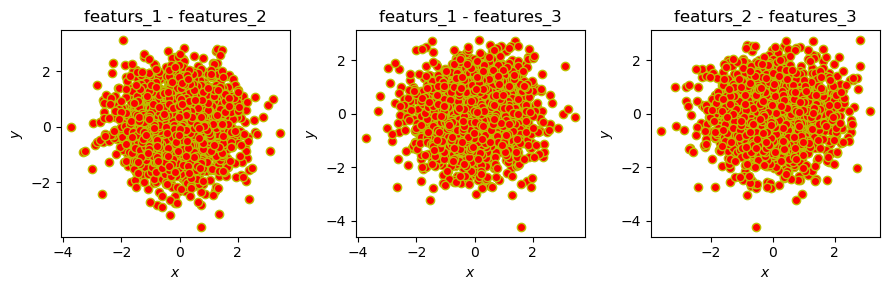

In [7]:

#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P data/

df = pd.read_csv('data/regression_generated.csv')
    
f_1 = df['features_1']
f_2 = df['features_2']
f_3 = df['features_3']

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(9,3))

ax1.scatter(x=f_1, y=f_2, marker='o', c='r', edgecolors='y')
ax1.set_title('featurs_1 - features_2')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.scatter(x=f_1, y=f_3, marker='o', c='r', edgecolors='y')
ax2.set_title('featurs_1 - features_3')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')

ax3.scatter(x=f_2, y=f_3, marker='o', c='r', edgecolors='y')
ax3.set_title('featurs_2 - features_3')
ax3.set_xlabel('$x$')
ax3.set_ylabel('$y$')

#the plots indicate that the features are not correlated

fig.tight_layout()

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

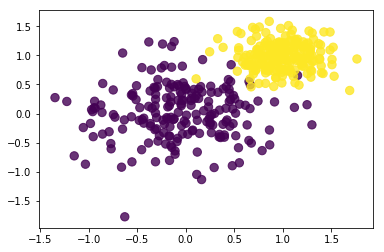

In [3]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

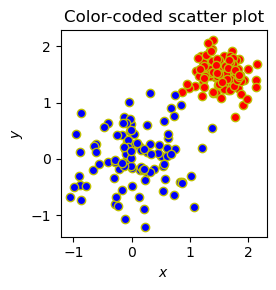

In [4]:


def random_dataset(mean1,variance1,mean2,variance2):
    cat1 = (npr.randn(100,2)*variance1)+mean1
    cat2 = (npr.randn(100,2)*variance2)*mean2
    
    return cat1,cat2
    
    
cat1, cat2 = random_dataset(1.5,0.25,1,0.5)

fig, ax = plt.subplots(figsize=(3,3))

ax.scatter(x=cat1[:,0], y=cat1[:,1], marker='o', c='r', edgecolors='y')
ax.scatter(x=cat2[:,0], y=cat2[:,1], marker='o', c='b', edgecolors='y')
ax.set_title('Color-coded scatter plot')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

fig.tight_layout()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

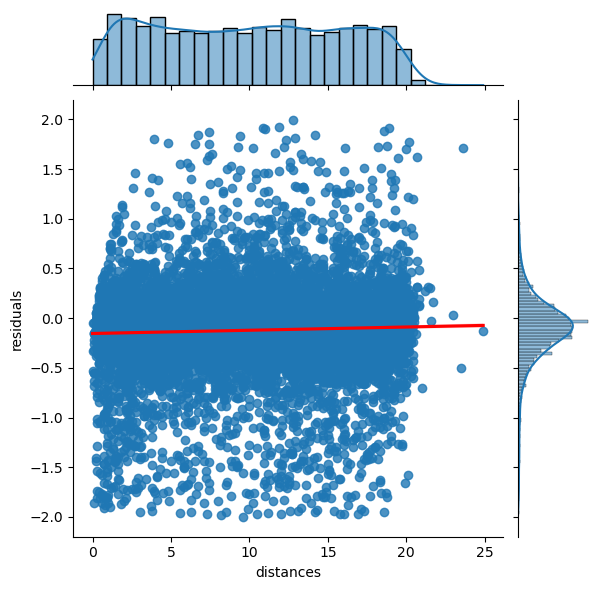

10
[ 0.    2.49  4.98  7.47  9.96 12.45 14.94 17.43 19.92 22.41 24.9 ]


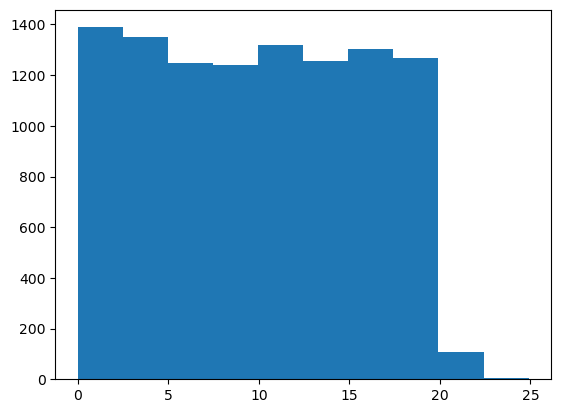

Centers x:  [1.245, 3.735, 6.225, 8.715, 11.205, 13.695, 16.185, 18.675, 21.165, 23.655]

Array of mean values of the residuals:
 [-0.18053968 -0.14835147 -0.11658941 -0.09053693 -0.06917519 -0.12938387
 -0.14441328 -0.10583914  0.05822731  0.41285714]

Array of standard deviation of the residuals:
 [0.44247838 0.40980401 0.44089944 0.41464484 0.4647127  0.47204643
 0.44378974 0.39928691 0.4830778  0.94226027]


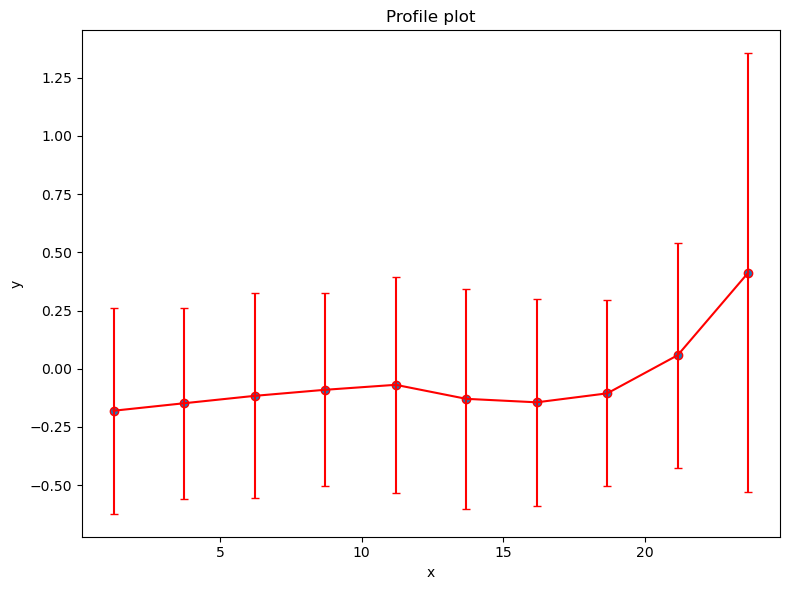

In [5]:


infile = open('data/residuals_261.pkl', 'rb')
new_dict = pickle.load(infile)
infile.close()


df = pd.DataFrame(new_dict.item())
df = df[ abs(df['residuals'])<2 ]


sns.jointplot(y="residuals", x="distances", data=df, kind="reg", line_kws={"color":"red"} )

plt.show()

#as before, we can see from the scatter plot that the two feature are low correlated

b = int(math.sqrt(df['distances'].count()) / 10)
print(b)
h, bins, _ = plt.hist(df['distances'], bins = b)
print(bins)
x=[]
for i in range((len(bins)-1)):
    x.append(round((bins[i]+bins[i+1])/2,4))

    

plt.show()
print("Centers x: ",x)

list_residual = []
list_err = []
for i in range((len(bins))-1):

    low = bins[i]
    high = bins[i+1]
    
    indeces = (df['distances'] >= low) & (df['distances'] < high)
    mean = df['residuals'][indeces].mean()
    list_residual.append(mean)
    std = np.std(df['residuals'][indeces])
    list_err.append(std)

y = np.array(list_residual)
err_y = np.array(list_err)
print("\nArray of mean values of the residuals:\n", y)
print("\nArray of standard deviation of the residuals:\n", err_y)

fig, ax1 = plt.subplots(figsize=(8,6))

#ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=4, rowspan=2)
ax1.scatter(x=x, y=y, edgecolor='r')
ax1.errorbar(x=x, y=y, yerr=err_y, fmt='r', capsize=3)
ax1.set_title('Profile plot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')


plt.tight_layout()


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


/var/folders/tt/56w0r1g170lf22xrrdw322dw0000gn/T/ipykernel_18413/2543396668.py:51: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  gaussian_sum = np.sum(norm.pdf(bin_centers, loc=value, scale=std_devs) * error for value, error in zip(bin_centers, errors))


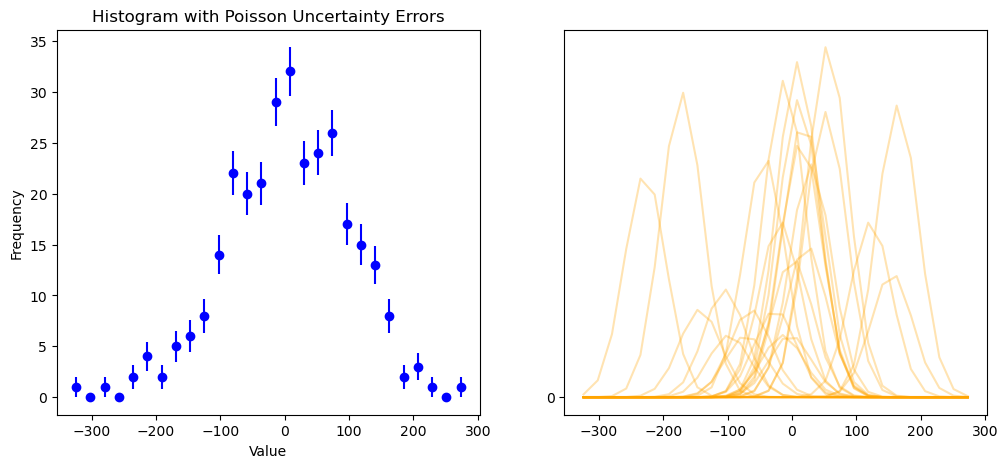

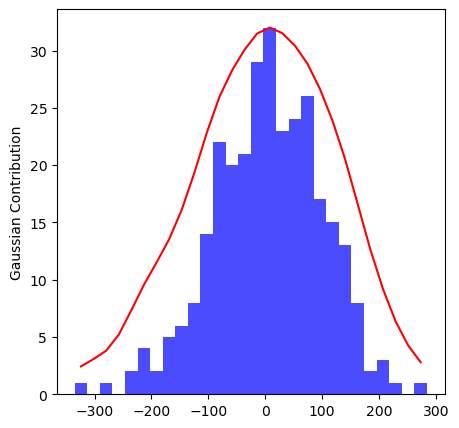

In [6]:
mean = 5
variance = 100
#x = (npr.randn(100)*variance)+mean
x = np.random.normal(loc=mean, scale=variance, size=300)

b = int(math.sqrt(len(x))/0.6)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))


hist, bin_edges = np.histogram(x, bins = b)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2




ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram with Poisson Uncertainty Errors')


plt.yticks(np.arange(0, max(hist) + 1, 1))


errors = np.sqrt(hist)

ax1.errorbar(bin_centers, hist, yerr=errors**0.5, fmt='o', color='blue', label='Histogram')





fig, ax3 = plt.subplots(figsize=(5,5))


hist, bin_edges, _ = ax3.hist(x, bins=b, density=False, alpha=0.7, color='blue', label='Histogram')
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2




std_devs = 1.06 * np.std(x) * np.power(len(x), -1/5)

for value, error in zip(x, errors):
    gaussian = norm.pdf(bin_centers, loc=value, scale=std_devs)
    ax2.plot(bin_centers, gaussian * error, color='orange', alpha=0.3)



ax3.set_ylabel('Gaussian Contribution')

gaussian_sum = np.sum(norm.pdf(bin_centers, loc=value, scale=std_devs) * error for value, error in zip(bin_centers, errors))
gaussian_sum /= trapz(gaussian_sum, bin_centers)


ax3.plot(bin_centers, gaussian_sum * max(hist) / max(gaussian_sum), color='red', label='KDE')

plt.show()
